In [1]:
import pytesseract as pytess
pytess.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract'
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time
from imutils.object_detection import non_max_suppression
from imutils import grab_contours
from imutils import skeletonize
from imutils.perspective import four_point_transform
PATH_FROZEN_GRAPH = "frozen_east_text_detection.pb"

def preprocess(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.GaussianBlur(image, (5,5), 0)
    _,image = cv2.threshold(image,100,150,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
    return image

def LoadImage():
    image = cv2.imread("frame.png")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    orig = image.copy()

    (H, W) = image.shape[:2]
    (nH, nW) = (320, 320)
    rW = W/nW; rH = H/nH
    image = cv2.resize(image, (nW, nH))

    plt.imshow(image, 'gray')
    plt.show()
    
    layers = [
        "feature_fusion/Conv_7/Sigmoid", # output probability
        "feature_fusion/concat_3"]       # bounding box

    blob = cv2.dnn.blobFromImage(image, 1.0, (nW, nH), (0, 0, 0), swapRB=False, crop=False)
    model = cv2.dnn.readNet(PATH_FROZEN_GRAPH)
    model.setInput(blob)
    (prob, boxes) = model.forward(layers)
    
    (numRows, numCols) = prob.shape[2:4]
    rects = []
    confidences = []

    for y in range(0, numRows):

        probData = prob[0, 0, y]
        xData0 = boxes[0, 0, y]
        xData1 = boxes[0, 1, y]
        xData2 = boxes[0, 2, y]
        xData3 = boxes[0, 3, y]
        anglesData = boxes[0, 4, y]

        for x in range(0, numCols):

            if probData[x] < 0.5:
                continue

            (offsetX, offsetY) = (x * 4.0, y * 4.0)

            angle = anglesData[x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            h = xData0[x] + xData2[x]
            w = xData1[x] + xData3[x]

            endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
            endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
            startX = int(endX - w)
            startY = int(endY - h)

            rects.append((startX, startY, endX, endY))
            confidences.append(probData[x])

    bbs = non_max_suppression(np.array(rects), probs=confidences)
    copy = orig.copy()
    # draw the bounding box on the image
    cropped = []
    for (startX, startY, endX, endY) in bbs:
        startX = max(0, int(startX * rW) - 10)
        startY = max(0, int(startY * rH) - 10)
        endX = int(endX * rW) + 10
        endY = int(endY * rH) + 10
        cropped.append(orig[startY: endY, startX: endX])
        cv2.rectangle(copy, (startX, startY), (endX, endY), (0, 255, 0), 2)
    plt.imshow(copy, 'gray')
    plt.show()
    
    for img in cropped:
        processed = preprocess(img)
        #blurred = cv2.GaussianBlur(processed, (5, 5), 0)
        #edges = cv2.Canny(blurred, 75, 200)
        #ontours, _ = cv2.findContours(blurred.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #contour = sorted(contours, key=cv2.contourArea)[-1]
        #rect = cv2.minAreaRect(contour)
        #box = np.int0(cv2.boxPoints(rect))
        #cv2.drawContours(blurred,[box],0,(255,0,0),2)
        #skeleton = skeletonize(blurred, size=(3,3))
        print(pytess.image_to_string(processed, config='-l eng --oem 1 --psm 7'))
        plt.imshow(processed, 'gray')
        plt.figure()
    plt.show()




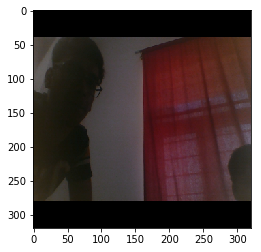

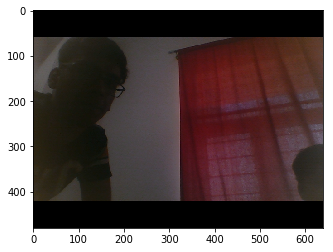

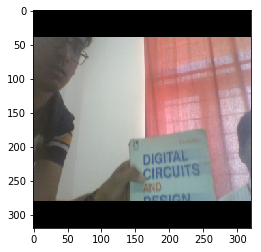

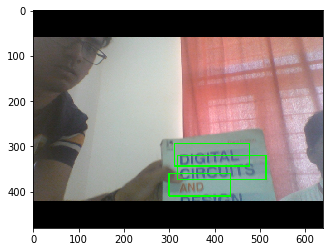

CIRCUITS
DIGITAL -
_ he


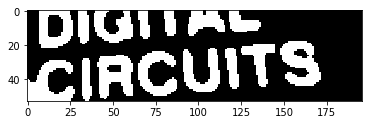

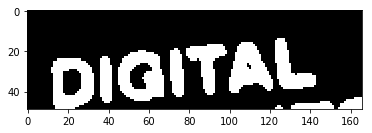

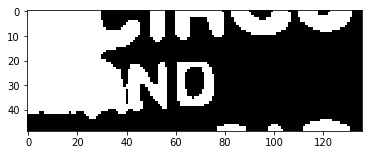

<Figure size 432x288 with 0 Axes>

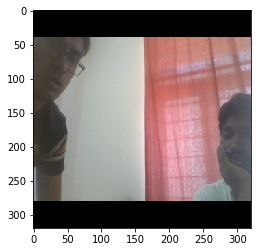

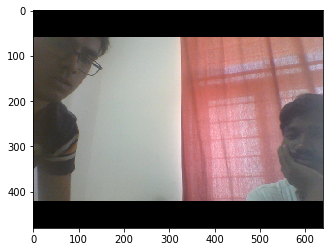

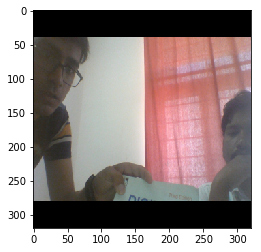

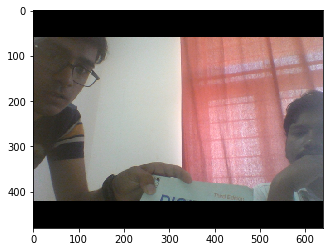

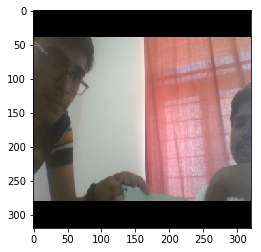

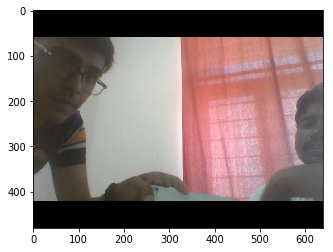

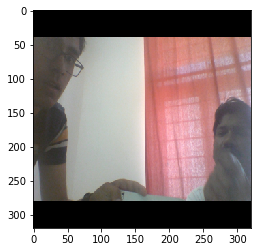

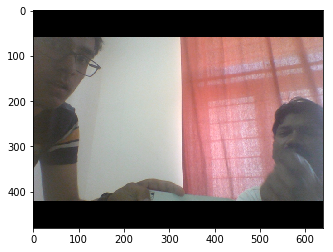

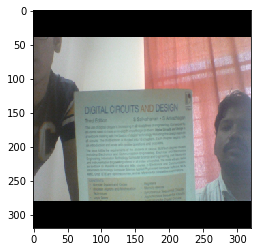

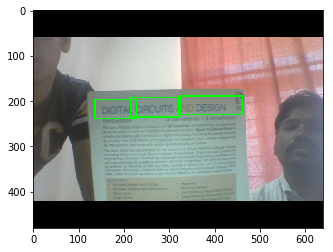

Re oh ie
orcs
NO DESIGN Le


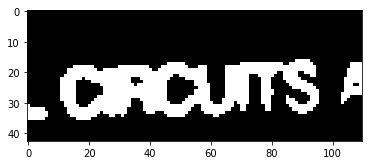

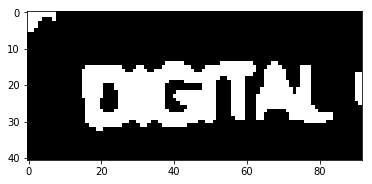

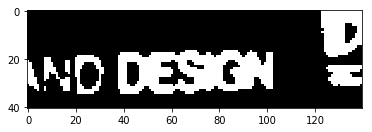

<Figure size 432x288 with 0 Axes>

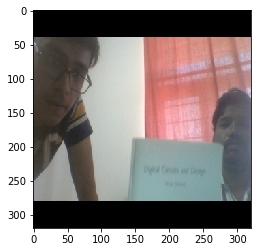

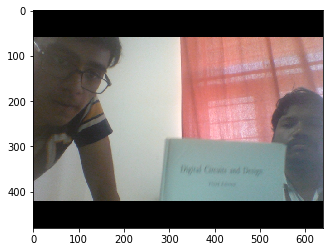

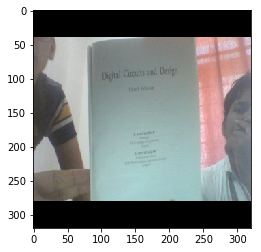

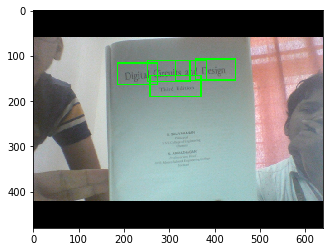

Pees
enn
wee
rn!



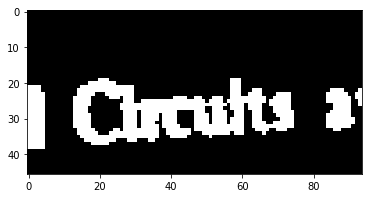

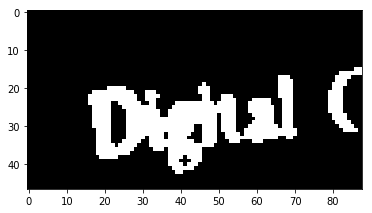

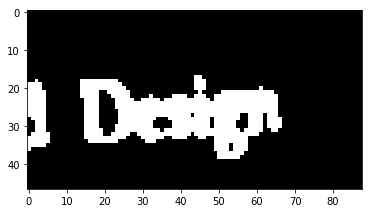

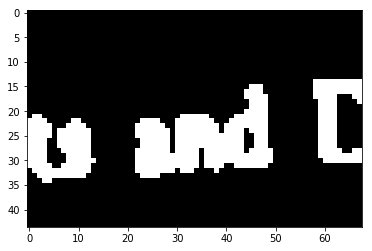

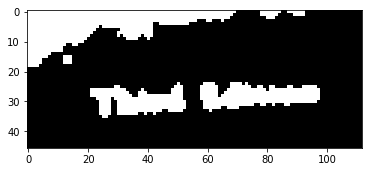

<Figure size 432x288 with 0 Axes>

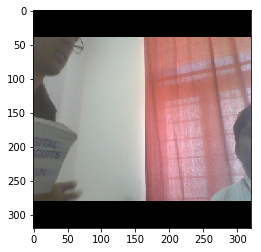

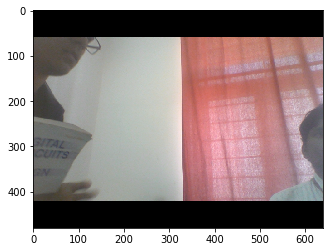

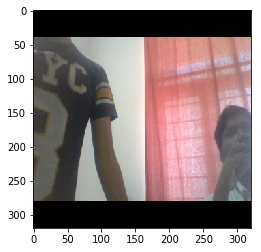

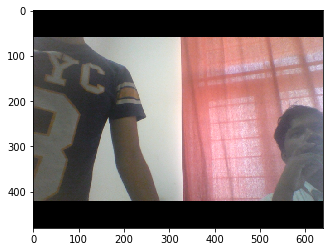

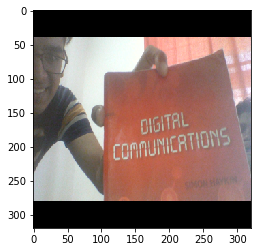

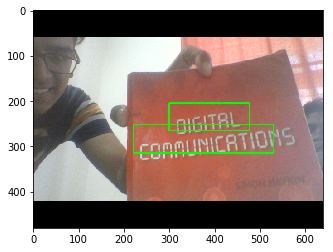

NIGITAL
emma NICATION


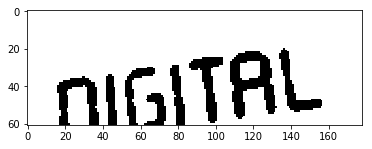

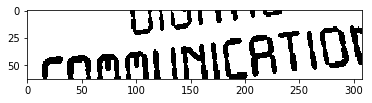

<Figure size 432x288 with 0 Axes>

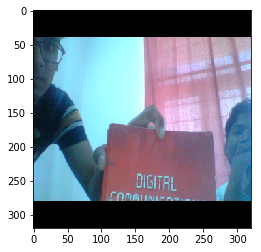

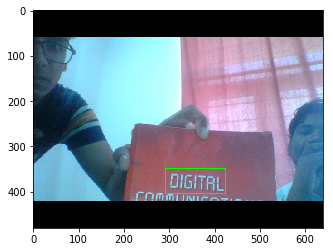

DIGITAL


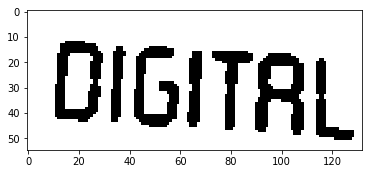

<Figure size 432x288 with 0 Axes>

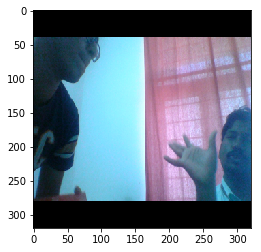

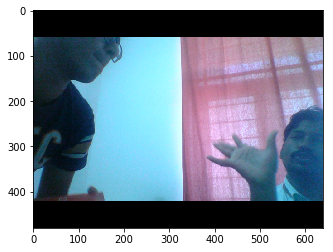

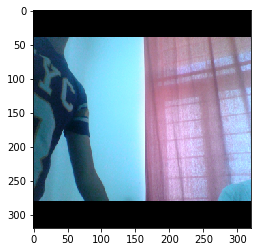

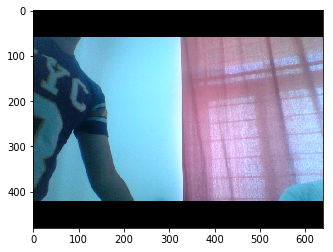

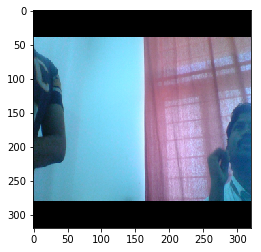

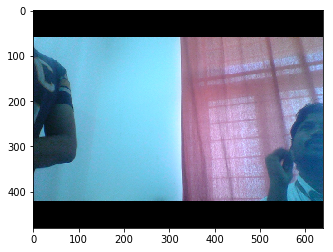

KeyboardInterrupt: 

In [2]:
while(True):
    LoadImage()
    time.sleep(5)